# WeatherPy

---

## Code to Generate Random Geographic Coordinates and a List of Cities

In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0


    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=" + units

  # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")


  
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

    
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})   
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | taksimo
Processing Record 3 of Set 1 | portland
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | alice springs
Processing Record 6 of Set 1 | aswan
Processing Record 7 of Set 1 | egilsstadir
Processing Record 8 of Set 1 | mejit
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | jwaneng
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | gueltat zemmour
City not found. Skipping...
Processing Record 14 of Set 1 | rancho palos verdes
Processing Record 15 of Set 1 | hastings
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | jatai
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | oban
Processing Rec

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [9]:
# Display sample data
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-15.70,88,100,7.07,RU,1738732849
1,taksimo,56.3444,114.8794,-5.08,73,100,3.40,RU,1738732850
2,portland,45.5234,-122.6762,37.65,83,100,3.00,US,1738732574
3,port-aux-francais,-49.3500,70.2167,42.24,96,93,24.11,TF,1738732852
4,alice springs,-23.7000,133.8833,98.15,20,20,25.32,AU,1738732853


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-15.70,88,100,7.07,RU,1738732849
1,taksimo,56.3444,114.8794,-5.08,73,100,3.40,RU,1738732850
2,portland,45.5234,-122.6762,37.65,83,100,3.00,US,1738732574
3,port-aux-francais,-49.3500,70.2167,42.24,96,93,24.11,TF,1738732852
4,alice springs,-23.7000,133.8833,98.15,20,20,25.32,AU,1738732853


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

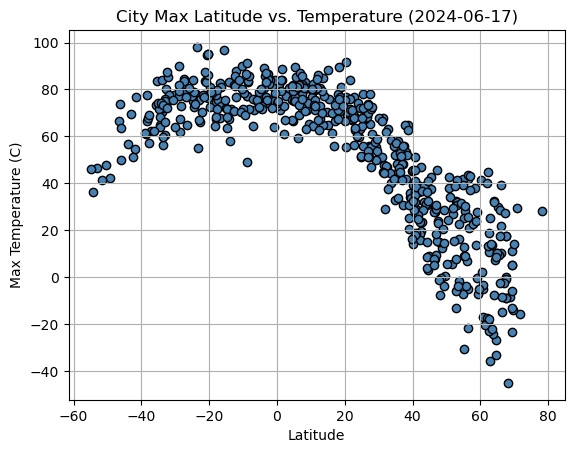

In [43]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

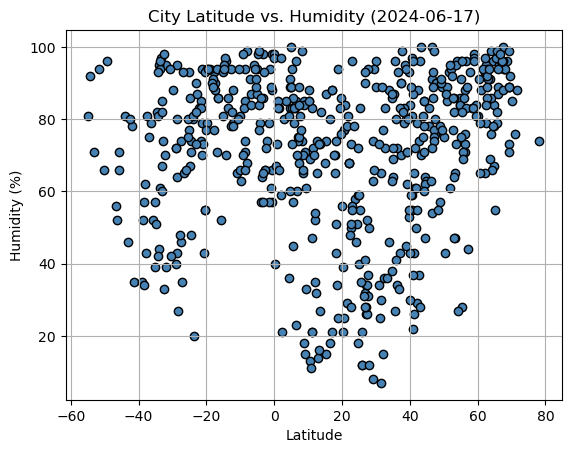

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

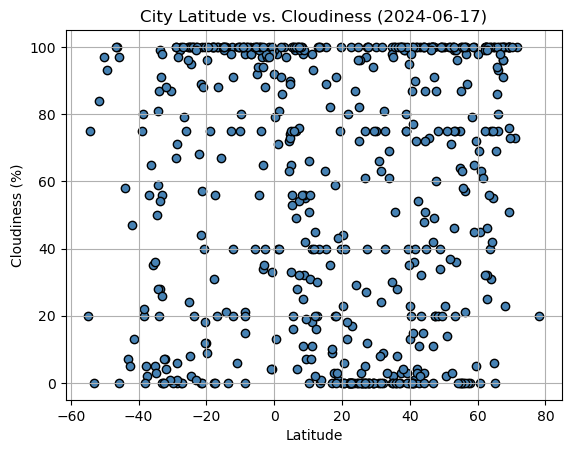

In [49]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

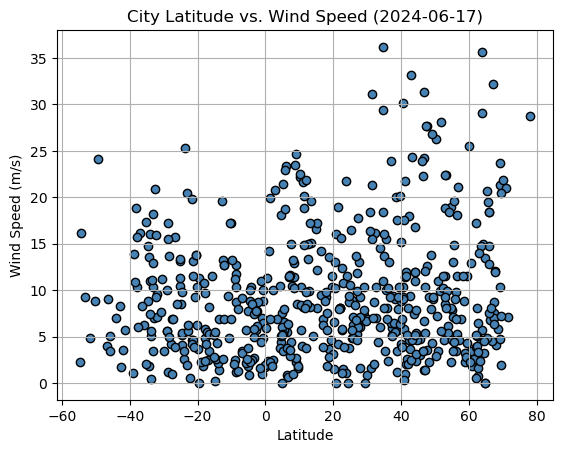

In [51]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [144]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression = slope * x + intercept
    
    line_eq = f"y ={slope: .2f}x+{intercept: .2f}"
    
    plt.plot(x, regression, color = "red")
    plt.annotate(line_eq, eqn_coordinates, fontsize=16, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [146]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_data_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-15.70,88,100,7.07,RU,1738732849
1,taksimo,56.3444,114.8794,-5.08,73,100,3.40,RU,1738732850
2,portland,45.5234,-122.6762,37.65,83,100,3.00,US,1738732574
5,aswan,24.0934,32.9070,59.61,46,29,11.48,EG,1738732855
6,egilsstadir,65.2653,-14.3948,30.11,55,0,20.71,IS,1738732856


In [148]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_data_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,42.24,96,93,24.11,TF,1738732852
4,alice springs,-23.7000,133.8833,98.15,20,20,25.32,AU,1738732853
8,waitangi,-43.9535,-176.5597,56.82,81,58,7.00,NZ,1738732858
9,adamstown,-25.0660,-130.1015,77.52,77,24,10.40,PN,1738732860
10,jwaneng,-24.6004,24.7303,72.72,48,2,9.80,BW,1738732861


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8804905104090431


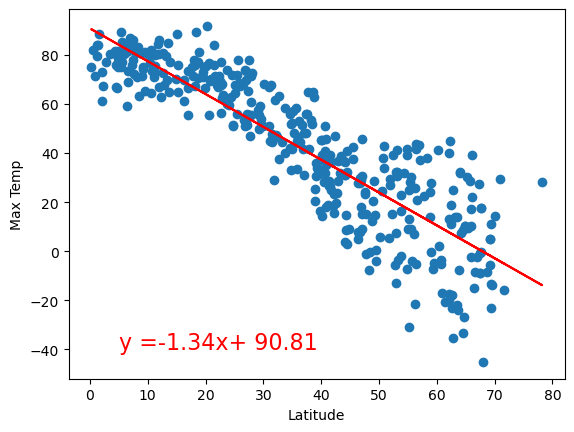

In [150]:
# Linear regression on Northern Hemisphere
linear_regress(northern_data_df["Lat"].rename("Latitude"), northern_data_df["Max Temp"], (5, -40))

The r-value is: 0.4939713799366589


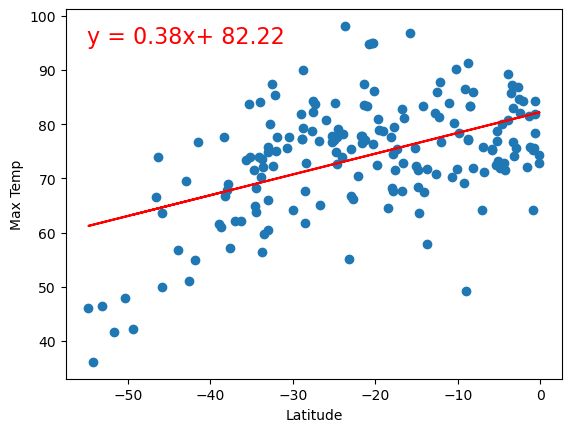

In [152]:
# Linear regression on Southern Hemisphere
linear_regress(southern_data_df["Lat"].rename("Latitude"), southern_data_df["Max Temp"], (-55, 95))

**Discussion about the linear relationship:** \
There is a negative correlation between latitude and temperature in northern hemisphere. \
There is a slighter positive coorelation between latitude and temperature in southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3428419129047802


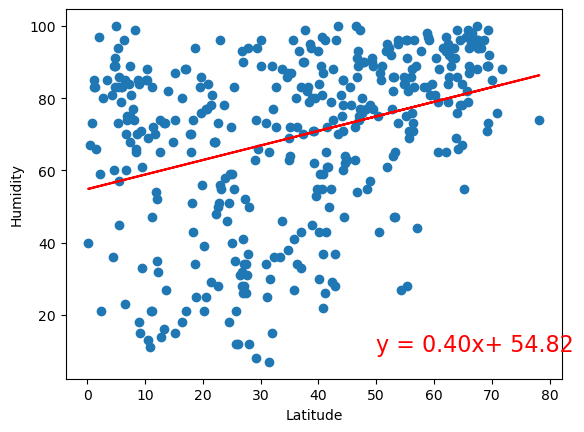

In [154]:
# Northern Hemisphere
linear_regress(northern_data_df["Lat"].rename("Latitude"), northern_data_df["Humidity"], (50, 10))

The r-value is: 0.30050116045581143


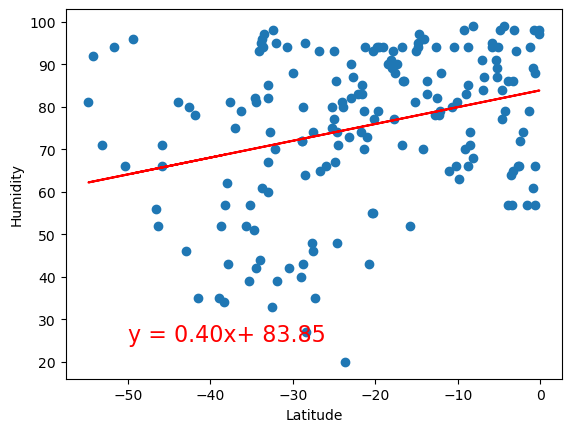

In [156]:
# Southern Hemisphere
linear_regress(southern_data_df["Lat"].rename("Latitude"), southern_data_df["Humidity"], (-50, 25))

**Discussion about the linear relationship:** \
There is a slighter positive correlation between latitude and humidity in both northern and southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1757842846130335


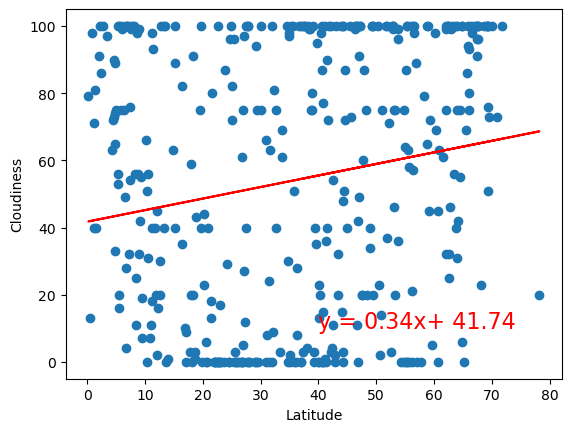

In [164]:
# Northern Hemisphere
linear_regress(northern_data_df["Lat"].rename("Latitude"), northern_data_df["Cloudiness"], (40, 10))

The r-value is: 0.3062356053023427


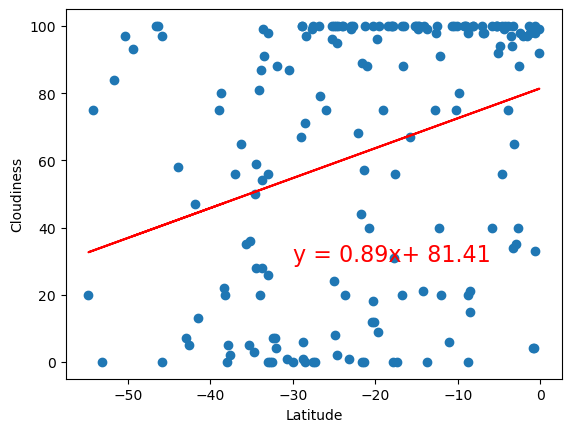

In [168]:
# Southern Hemisphere
linear_regress(southern_data_df["Lat"].rename("Latitude"), southern_data_df["Cloudiness"], (-30, 30))

**Discussion about the linear relationship:** \
There is a weak positive correlation between latitude and cloudiness in northern hemisphere. \
There is a strong positive correlation between latitude and cloudiness in southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06836037719390776


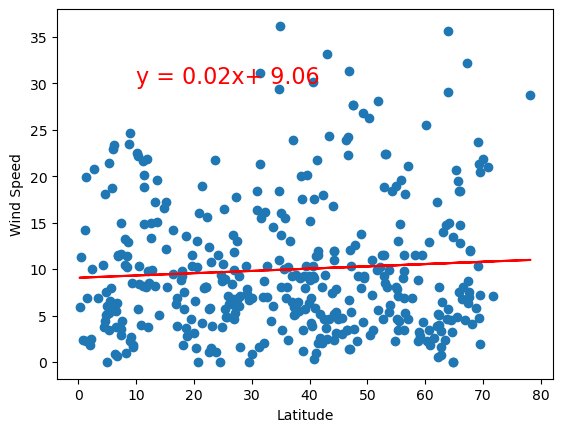

In [174]:
# Northern Hemisphere
linear_regress(northern_data_df["Lat"].rename("Latitude"), northern_data_df["Wind Speed"], (10, 30))

The r-value is: -0.21510268626688375


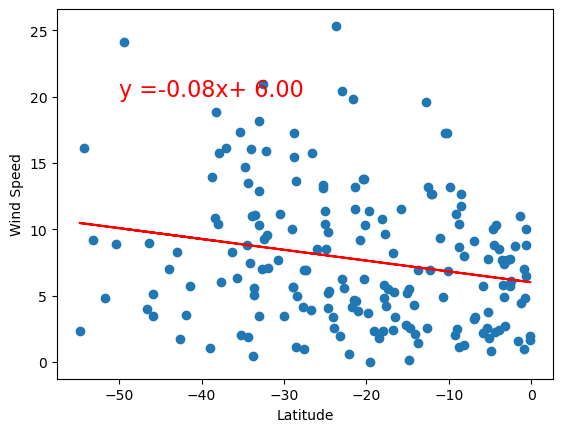

In [178]:
# Southern Hemisphere
linear_regress(southern_data_df["Lat"].rename("Latitude"), southern_data_df["Wind Speed"], (-50, 20))

**Discussion about the linear relationship:** \
There is a neglagible relation between latitude and wind speed in northern hemisphere. \
There is a negative correlation between latitude and wind speed in southern hemisphere.